In [1]:
! git clone https://github.com/z-arabi/SRU-deeplearning-workshop
%cd SRU-deeplearning-workshop

Cloning into 'SRU-deeplearning-workshop'...
remote: Enumerating objects: 164, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 164 (delta 33), reused 34 (delta 11), pack-reused 89
Receiving objects: 100% (164/164), 14.56 MiB | 25.88 MiB/s, done.
Resolving deltas: 100% (70/70), done.
/content/SRU-deeplearning-workshop


In [2]:
import numpy as np
np.random.seed(123)  # for reproducibility

## Without Dropout



In [3]:
# 1. Import libraries and modules
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt
%matplotlib inline 

np.random.seed(123)  # for reproducibility

# 2. Load pre-shuffled HODA data into train and test sets
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

# 3. Preprocess input data
''' 3.1: input data in numpy array format'''
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

# 5. Define model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Keras' fit method loads all the data into memory at once meaning changing your batch size will have no effect on the RAM it takes up.  
  

By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.  
verbose=0 will show you nothing (silent)  
verbose=1 will show you an animated progress bar  
verbose=2 will just mention the number of epoch    


In [4]:
model.fit(x_train, y_train,
              epochs=1,
              batch_size=128, verbose=0)

In [5]:
# default
model.fit(x_train, y_train,
              epochs=1,
              batch_size=128, verbose=1)

8/8 [==============================] - 0s 5ms/step - loss: 1.9513 - accuracy: 0.5300


In [6]:
model.fit(x_train, y_train,
              epochs=1,
              batch_size=128, verbose=2)

8/8 - 0s - loss: 1.7084 - accuracy: 0.6470 - 46ms/epoch - 6ms/step


In [7]:
# it seems that the model.fit saves the latest weights
# 5. Define model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
              epochs=10,
              batch_size=128)

Epoch 1/10
8/8 [==============================] - 2s 11ms/step - loss: 2.2513 - accuracy: 0.1810
Epoch 2/10
8/8 [==============================] - 0s 22ms/step - loss: 2.0093 - accuracy: 0.4930
Epoch 3/10
8/8 [==============================] - 0s 12ms/step - loss: 1.7639 - accuracy: 0.6190
Epoch 4/10
8/8 [==============================] - 0s 11ms/step - loss: 1.4880 - accuracy: 0.7120
Epoch 5/10
8/8 [==============================] - 0s 10ms/step - loss: 1.2001 - accuracy: 0.7710
Epoch 6/10
8/8 [==============================] - 0s 13ms/step - loss: 0.9449 - accuracy: 0.8150
Epoch 7/10
8/8 [==============================] - 0s 11ms/step - loss: 0.7509 - accuracy: 0.8420
Epoch 8/10
8/8 [==============================] - 0s 6ms/step - loss: 0.6155 - accuracy: 0.8530
Epoch 9/10
8/8 [==============================] - 0s 7ms/step - loss: 0.5250 - accuracy: 0.8630
Epoch 10/10
8/8 [==============================] - 0s 6ms/step - loss: 0.4654 - accuracy: 0.8660


In [8]:
# it seems that the model.fit saves the latest weights

# 5. Define model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

for i in range(10):
  model.fit(x_train, y_train,
              epochs=1,
              batch_size=128)

8/8 [==============================] - 0s 8ms/step - loss: 0.4376 - accuracy: 0.8740


In [9]:
# 5. Define model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

train_loss = []
train_acc = []
test_loss = []
test_acc = []

for i in range(200):
    # 7. Fit model on training data
    model.fit(x_train, y_train,
              epochs=1,
              batch_size=128, verbose=0)

    # 8. Evaluate model on test data
    loss, acc = model.evaluate(x_train, y_train, verbose=0)
    train_loss += [loss]
    train_acc += [acc]
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    test_loss += [loss]
    test_acc += [acc]
print("Test Accuracy:",test_acc[-1],"\nMaximum Test Acuracy During Training: ", max(test_acc))

Test Accuracy: 0.9350000023841858 
Maximum Test Acuracy During Training:  0.9399999976158142


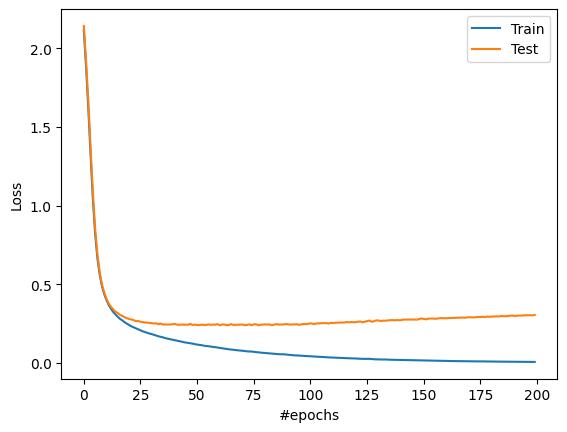

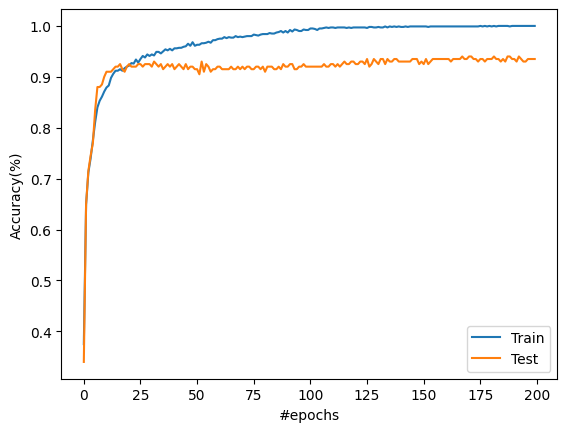

In [10]:
# having multiple plots

plt.figure(1)
plt.plot(train_loss, label='Train')
plt.plot(test_loss, label='Test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(train_acc, label='Train')
plt.plot(test_acc, label='Test')
plt.xlabel('#epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()

## With Dropout



Test Accuracy: 0.9350000023841858 
Maximum Test Acuracy During Training:  0.9549999833106995


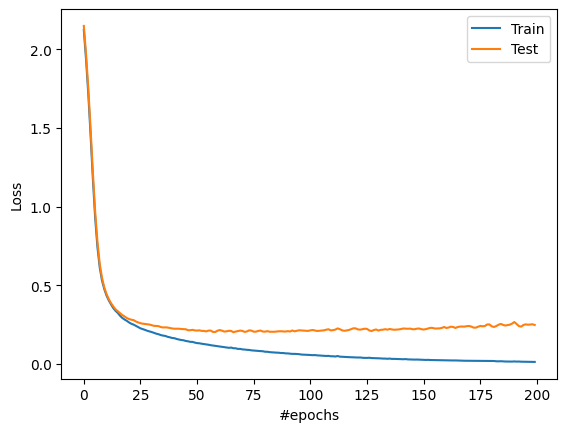

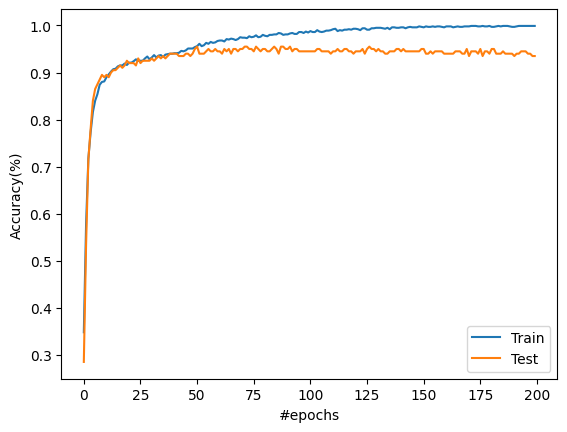

In [11]:
# 1. Import libraries and modules
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt
%matplotlib inline  

np.random.seed(123)  # for reproducibility

# 2. Load pre-shuffled HODA data into train and test sets
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

# 3. Preprocess input data
''' 3.1: input data in numpy array format'''
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

# 5. Define model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

train_loss = []
train_acc = []
test_loss = []
test_acc = []

for i in range(200):
    # 7. Fit model on training data
    model.fit(x_train, y_train,
              epochs=1,
              batch_size=128, verbose=0)

    # 8. Evaluate model on test data
    loss, acc = model.evaluate(x_train, y_train, verbose=0)
    train_loss += [loss]
    train_acc += [acc]
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    test_loss += [loss]
    test_acc += [acc]
print("Test Accuracy:",test_acc[-1],"\nMaximum Test Acuracy During Training: ", max(test_acc))

plt.figure(1)
plt.plot(train_loss, label='Train')
plt.plot(test_loss, label='Test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(train_acc, label='Train')
plt.plot(test_acc, label='Test')
plt.xlabel('#epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()